<a href="https://colab.research.google.com/github/stefanogiagu/corso_AI_2022/blob/main/esempi/Esempio_secondoesonero_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prova Esame 7.9.2020 - Metodi AI e Machine Learning per la fisica 
### AA 2019/20 - Docente: S. Giagu


> **Regole:**

* tempo a disposizione: 3h
*   compilare con i vostri dati i campi della cella che segue e poi eseguire la cella verificando che i dati printati corrispondano
*   risolvere i quesiti/compiti indicati nella cella *Descrizione del compito* usando questo notebook
*   una volta completato il compito sottomettere il notebook nel apposito folder sul sito e-learning del corso disponibile al link: [consegna esonero](https://elearning.uniroma1.it/mod/assign/view.php?id=325082) (NOTA BENE: una volta sottomesso il notebook non sono più possibili modifiche ulteriori)

In [ ]:
#@ Dati personali
import os

Nome = 'Stefano'  #@param {type: "string"}
Cognome = 'Giagu' #@param {type: "string"}
NumeroMatricola = 12345678 #@param {type: "number"}

if NumeroMatricola == 12345678:
  print('\033[1;31m Inserisci il numero di matricola corretto!!!!') 
else:
  print('Done')

 Inserisci il numero di matricola corretto!!!!


# Compiti:

costruire un modello basato su una rete neurale che risolva il task di predire la posizione dei massimi assoluti e relativi di una funzione 2D: $y = f (x_1, x_2)$, costituita dalla somma di due funzioni [normali bi-variate](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Bivariate_case).

**Forma della funzione e parametri:** 

$f(x_1, x_2) = \alpha N(x_1,x_2|\mu_1,\Sigma_1) + (1-\alpha)N(x_1,x_2|\mu_2,\Sigma_2)$ 

in cui:

valori medi: $\mu_i = [\mu_{x_1}^{(i)}, \mu_{x_2}^{(i)}]$ 

matrice covarianza: $\Sigma_i = 
\begin{bmatrix}
(\sigma_{x_1}^{(i)})^2 & \rho_i\sigma_{x_1}^{(i)}\sigma_{x_2}^{(i)} \\
\rho_i\sigma_{x_1}^{(i)}\sigma_{x_2}^{(i)} &(\sigma_{x_2}^{(i)})^2
\end{bmatrix}$


$\alpha$ parametro $\in [0,1]$ che fissa il peso tra le due funzioni normali bi-variate.

**Suggerimento:** è possibile generare coppie $(x_1,x_2)$ in accordo ad una distribuzione normale bi-variata, usando la funzione numpy [multivariate_normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.multivariate_normal.html#numpy.random.Generator.multivariate_normal). Vedere esempio uso più in basso nel NB.

### 1: Generare il Dataset:

produrre un dataset di dimensione opportuna per risolvere il compito. Il modello deve essere in grado di predire le coordinate dei due massimi delle due distribuzioni normali bi-variate nel seguente range di variazione dei parametri:

- $x_1 \in [0, 10]$
- $x_2 \in [0, 10]$
- $\rho_i \in [-0.8,0.8]$, con $\rho_1$ e $\rho_2$ indipendenti
- $\alpha \in [0.3,0.8]$
- $\mu_{j}^{(i)} \in [2,8]$, con tutti i quattro $\mu_{j}^{(i)}$ indipendenti l'uno dall'altro
- $\sigma_{x_1}^{(1)} = \sigma_{x_2}^{(1)} = 1.0$ e $\sigma_{x_1}^{(2)} = \sigma_{x_2}^{(2)} = 2.0$.

### 2: Costuire e addestrare il modello

è possibile scegliere qualsiasi dei modelli di ANN (appropriati per il compito) tra quelli trattati durante il corso. È richiesto di verificare la qualità dell'addestramento, una ottimizzazione degli iper-parametri del modello più rilevanti, e una misura corretta delle prestazioni del modello addestrato rispetto alla task. 

Il modello verrà testato durante la correzione su un campione indipendente che soddisfa i requisiti indicati sopra per verifcare la bontà e capacità di generalizzazione del modello proposto.

Utilizzare dove necessario celle di testo (*+Text*) per descrivere (brevemente) le operazioni eseguite, motivandole e/o commentandone i risultati ottenuti.



In [ ]:
#parte libera ... aggiungere a piacimento tutte le celle di codice e testo necessarie ...

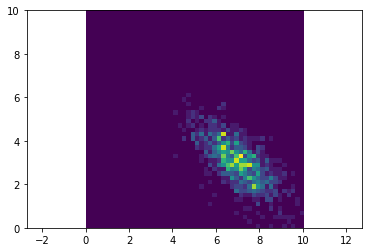

In [ ]:
# Esempio uso funzione numpy multivariate_normal per generare coppie di numeri in accordo ad una distribuzione gaussiana bivariata
import numpy as np
import matplotlib.pyplot as plt

mean = [7, 3]
cov = np.matrix([[1, -0.7], [-0.7, 1]])


x, y = np.random.default_rng().multivariate_normal(mean, cov, 1000).T
H, xedges, yedges = np.histogram2d(x, y, bins=(50,50), range=([0,10],[0,10]))
plt.imshow(H.T, origin='lower', extent=[0,10,0,10])
plt.axis('equal')
plt.show()

In [ ]:
#Calcolo del Massimo

print('Valoore del massimo della funzioneL ',H.max())
idx = np.argwhere(H == H.max())
width = 10./50
print ('Coordinate del massimo: ', idx[0][0] * width + width/2, idx[0][1] * width + width/2.)

Valoore del massimo della funzioneL  14.0
Coordinate del massimo:  7.1 3.3000000000000003
